In [4]:
import numpy as np
import pandas as pd


In [3]:
ebola_df = pd.read_csv('ebola_data_db_format.csv')
pop_df = pd.read_csv('population_income_data.csv')

In [114]:
pop_df.head()

,Time,Time Code,Country Name,Country Code,Population density (people per sq. km of land area) [EN.POP.DNST],Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD],GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]
0,2014,YR2014,Guinea,GIN,45.380799,595.85438972692,759.587862
1,2014,YR2014,Liberia,LBR,45.260673,..,740.375959
2,2014,YR2014,Italy,ITA,205.564558,24322.0796428298,29979.918722
3,2014,YR2014,United Kingdom,GBR,267.028884,36733.3838408965,44596.189750
4,2014,YR2014,United States,USA,34.806134,47670.0399498095,55675.386854


In [115]:
pop_df['Country Name'].value_counts()

Guinea            3
Liberia           3
Italy             3
United Kingdom    3
United States     3
Sierra Leone      3
Nigeria           3
Senegal           3
Spain             3
Mali              3
Name: Country Name, dtype: int64

In [116]:
ebola_df.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


In [117]:
ebola_df.Country.value_counts()

Sierra Leone                2303
Nigeria                     2124
Guinea                      2086
Senegal                     2081
United States of America    1932
Spain                       1924
Liberia                     1540
Mali                        1234
United Kingdom              1107
Italy                        708
Liberia 2                    536
Guinea 2                      10
Name: Country, dtype: int64

In [118]:
ebola_df = ebola_df[~ebola_df['Country'].isin(['Liberia 2', 'Guinea 2'])]

In [119]:
ebola_df = ebola_df[ebola_df['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola cases']

In [120]:
ebola_df['Country'] = ebola_df['Country'].replace(['United States of America'], 'United States')

In [121]:
ebola_df.Country.value_counts()

Guinea            259
Liberia           259
Sierra Leone      259
Nigeria           255
Senegal           254
United States     245
Spain             243
Mali              239
United Kingdom    217
Italy             141
Name: Country, dtype: int64

In [122]:
ebola_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 0 to 17568
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  2371 non-null   object 
 1   Country    2371 non-null   object 
 2   Date       2371 non-null   object 
 3   value      2371 non-null   float64
dtypes: float64(1), object(3)
memory usage: 92.6+ KB


In [123]:
ebola_df = ebola_df.drop(columns= ['Indicator'])

In [124]:
ebola_df = ebola_df.rename(columns = {'value': 'Cases'})

In [125]:
dates = ebola_df.Date.unique()
countries = ebola_df.Country.unique()

In [126]:
for date in dates: 
    for country in countries: 
        if ((ebola_df['Country'] == country) & (ebola_df['Date'] == date)).any() == False: 
            new_row = {'Country': country, 'Date': date, 'Cases': 0}
            ebola_df = ebola_df.append(new_row, ignore_index = True)

/tmp/ipykernel_441022/490121321.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ebola_df = ebola_df.append(new_row, ignore_index = True)
/tmp/ipykernel_441022/490121321.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ebola_df = ebola_df.append(new_row, ignore_index = True)
/tmp/ipykernel_441022/490121321.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ebola_df = ebola_df.append(new_row, ignore_index = True)
/tmp/ipykernel_441022/490121321.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ebola_df = ebola_df.append(new_row, ignore_index = True)
/tmp/ipykernel_441022/490121321.py:5: FutureWarning: The frame.append method is 

In [127]:
ebola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  2590 non-null   object 
 1   Date     2590 non-null   object 
 2   Cases    2590 non-null   float64
dtypes: float64(1), object(2)
memory usage: 60.8+ KB


In [128]:
ebola_df['Year'] = pd.DatetimeIndex(ebola_df['Date']).year

In [129]:
pop_df = pop_df.rename(columns = {'Country Name': 'Country', 'Time':'Year'})
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Year                                                                             30 non-null     int64  
 1   Time Code                                                                        30 non-null     object 
 2   Country                                                                          30 non-null     object 
 3   Country Code                                                                     30 non-null     object 
 4   Population density (people per sq. km of land area) [EN.POP.DNST]                30 non-null     float64
 5   Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]  30 non-null     object 
 6   GDP per capit

In [130]:
pop_df = pop_df.drop(columns = ['Time Code', 'Country Code'])

In [131]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Year                                                                             30 non-null     int64  
 1   Country                                                                          30 non-null     object 
 2   Population density (people per sq. km of land area) [EN.POP.DNST]                30 non-null     float64
 3   Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]  30 non-null     object 
 4   GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]                              30 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ KB


In [132]:
pop_df.Year.value_counts()

2014    10
2015    10
2016    10
Name: Year, dtype: int64

In [133]:
pop_df.tail()

,Year,Country,Population density (people per sq. km of land area) [EN.POP.DNST],Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD],GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]
25,2016,Sierra Leone,101.535689,446.596210601579,610.490056
26,2016,Nigeria,204.179150,2080.91911470735,2575.455449
27,2016,Senegal,77.876248,1121.33974257948,1261.009472
28,2016,Spain,93.049263,22569.3506592936,26500.313901
29,2016,Mali,14.723484,668.009484727266,772.131839


In [134]:
pop_df['Year'] = pop_df['Year'].astype('int64')

In [135]:
merged_df = ebola_df.merge(pop_df, on = ['Country', 'Year'], how = 'inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 0 to 2589
Data columns (total 7 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country                                                                          2590 non-null   object 
 1   Date                                                                             2590 non-null   object 
 2   Cases                                                                            2590 non-null   float64
 3   Year                                                                             2590 non-null   int64  
 4   Population density (people per sq. km of land area) [EN.POP.DNST]                2590 non-null   float64
 5   Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]  2590 non-null   object 
 6   GDP per c

In [136]:
merged_df.head()

,Country,Date,Cases,Year,Population density (people per sq. km of land area) [EN.POP.DNST],Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD],GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]
0,Guinea,2015-03-10,3285.0,2015,46.52489,619.473480041721,769.255475
1,Guinea,2015-03-06,3248.0,2015,46.52489,619.473480041721,769.255475
2,Guinea,2015-03-05,3237.0,2015,46.52489,619.473480041721,769.255475
3,Guinea,2015-03-04,3205.0,2015,46.52489,619.473480041721,769.255475
4,Guinea,2015-03-02,3205.0,2015,46.52489,619.473480041721,769.255475


In [137]:
merged_df = merged_df.rename(columns = {'Population density (people per sq. km of land area) [EN.POP.DNST]': 'Pop_den', 'Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]': 'GNI_per_cap', 'GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]': 'GDP_per_cap'})

In [138]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 0 to 2589
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      2590 non-null   object 
 1   Date         2590 non-null   object 
 2   Cases        2590 non-null   float64
 3   Year         2590 non-null   int64  
 4   Pop_den      2590 non-null   float64
 5   GNI_per_cap  2590 non-null   object 
 6   GDP_per_cap  2590 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 161.9+ KB


In [139]:
merged_df['Month'] = pd.DatetimeIndex(ebola_df['Date']).month

In [140]:
merged_df.Month.value_counts()

9     300
10    270
12    240
7     230
8     220
6     220
1     210
5     210
3     180
2     180
11    180
4     150
Name: Month, dtype: int64

In [141]:
merged_df.Year.value_counts()

2015    2200
2014     380
2016      10
Name: Year, dtype: int64

In [142]:
merged_df.Country.unique()

array(['Guinea', 'Liberia', 'Sierra Leone', 'United Kingdom', 'Mali',
       'Nigeria', 'Senegal', 'Spain', 'United States', 'Italy'],
      dtype=object)

In [143]:
merged_df[merged_df['Year'] == 2016].head(20)

,Country,Date,Cases,Year,Pop_den,GNI_per_cap,GDP_per_cap,Month
2504,Guinea,2016-03-23,3804.0,2016,47.771586,649.121373665209,830.246164,10
2505,Liberia,2016-03-23,10666.0,2016,47.620307,..,692.618889,10
2506,Sierra Leone,2016-03-23,14122.0,2016,101.535689,446.596210601579,610.490056,10
2507,Italy,2016-03-23,1.0,2016,205.017950,25484.3060160314,30685.645899,10
2508,United Kingdom,2016-03-23,1.0,2016,271.200732,38028.8795974965,46081.715288,9
2509,Mali,2016-03-23,8.0,2016,14.723484,668.009484727266,772.131839,9
2510,Nigeria,2016-03-23,20.0,2016,204.179150,2080.91911470735,2575.455449,9
2511,Senegal,2016-03-23,1.0,2016,77.876248,1121.33974257948,1261.009472,9
2512,Spain,2016-03-23,1.0,2016,93.049263,22569.3506592936,26500.313901,9
2513,United States,2016-03-23,4.0,2016,35.318347,49147.3629167,57292.538783,9


In [144]:
dates = merged_df.Date.value_counts()

In [145]:
dates

2015-03-10    10
2015-10-27    10
2015-09-09    10
2015-09-10    10
2015-09-11    10
              ..
2015-05-29    10
2015-06-01    10
2015-06-02    10
2015-06-03    10
2016-03-23    10
Name: Date, Length: 259, dtype: int64

In [146]:
merged_df.to_csv('ebola_population.csv')

## 2) Same, but do not fill empty months with 0s

In [12]:
ebola_df = pd.read_csv('ebola_data_db_format.csv')
pop_df = pd.read_csv('population_income_data.csv').head(30)

In [13]:
ebola_df = ebola_df[~ebola_df['Country'].isin(['Liberia 2', 'Guinea 2'])]
ebola_df = ebola_df[ebola_df['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola cases']
ebola_df['Country'] = ebola_df['Country'].replace(['United States of America'], 'United States')

In [14]:
ebola_df = ebola_df.drop(columns= ['Indicator'])
ebola_df = ebola_df.rename(columns = {'value': 'Cases'})

In [15]:
ebola_df['Year'] = pd.DatetimeIndex(ebola_df['Date']).year

pop_df = pop_df.rename(columns = {'Country Name': 'Country', 'Time':'Year'})
pop_df = pop_df.drop(columns = ['Time Code', 'Country Code'])
pop_df['Year'] = pop_df['Year'].astype('int64')


In [17]:
merged_df = ebola_df.merge(pop_df, on = ['Country', 'Year'], how = 'inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 0 to 2370
Data columns (total 7 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country                                                                          2371 non-null   object 
 1   Date                                                                             2371 non-null   object 
 2   Cases                                                                            2371 non-null   float64
 3   Year                                                                             2371 non-null   int64  
 4   Population density (people per sq. km of land area) [EN.POP.DNST]                2371 non-null   float64
 5   Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]  2371 non-null   object 
 6   GDP per c

In [18]:
merged_df = merged_df.rename(columns = {'Population density (people per sq. km of land area) [EN.POP.DNST]': 'Pop_den', 'Adjusted net national income per capita (constant 2015 US$) [NY.ADJ.NNTY.PC.KD]': 'GNI_per_cap', 'GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]': 'GDP_per_cap'})

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 0 to 2370
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      2371 non-null   object 
 1   Date         2371 non-null   object 
 2   Cases        2371 non-null   float64
 3   Year         2371 non-null   int64  
 4   Pop_den      2371 non-null   float64
 5   GNI_per_cap  2371 non-null   object 
 6   GDP_per_cap  2371 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 148.2+ KB


In [20]:
merged_df = merged_df.drop(columns = 'GNI_per_cap')

In [21]:
merged_df.Country.value_counts()

Guinea            259
Liberia           259
Sierra Leone      259
Nigeria           255
Senegal           254
United States     245
Spain             243
Mali              239
United Kingdom    217
Italy             141
Name: Country, dtype: int64

In [22]:
groups = merged_df.groupby('Country')

In [25]:
for i in groups: 
    print(i[1].head())

  Country        Date   Cases  Year   Pop_den  GDP_per_cap
0  Guinea  2015-03-10  3285.0  2015  46.52489   769.255475
1  Guinea  2015-03-06  3248.0  2015  46.52489   769.255475
2  Guinea  2015-03-05  3237.0  2015  46.52489   769.255475
3  Guinea  2015-03-04  3205.0  2015  46.52489   769.255475
4  Guinea  2015-03-02  3205.0  2015  46.52489   769.255475
     Country        Date  Cases  Year     Pop_den   GDP_per_cap
2221   Italy  2015-05-15    1.0  2015  205.366538  30242.386135
2222   Italy  2015-05-14    1.0  2015  205.366538  30242.386135
2223   Italy  2015-05-19    1.0  2015  205.366538  30242.386135
2224   Italy  2015-05-18    1.0  2015  205.366538  30242.386135
2225   Italy  2015-05-20    1.0  2015  205.366538  30242.386135
     Country        Date   Cases  Year    Pop_den  GDP_per_cap
220  Liberia  2015-03-10  9343.0  2015  46.430949   721.581051
221  Liberia  2015-03-06  9249.0  2015  46.430949   721.581051
222  Liberia  2015-03-05  9249.0  2015  46.430949   721.581051
223  Liber

In [27]:
min_date = min(pd.DatetimeIndex(merged_df['Date']))

In [28]:
min_date

Timestamp('2014-08-29 00:00:00')

In [32]:
merged_df['Months_diff'] = ((pd.DatetimeIndex(merged_df.Date) - min_date)/np.timedelta64(1, 'M')).astype('int')

In [35]:
merged_df['Months_diff'] = merged_df['Months_diff'] + 1

In [36]:
merged_df.Months_diff.value_counts()

11    220
12    220
13    210
9     210
10    210
14    180
6     180
5     171
7     153
8     126
15    120
16    110
4      72
3      72
2      53
1      44
17     10
19     10
Name: Months_diff, dtype: int64

In [39]:
merged_df = merged_df.sort_values(by =['Country', 'Date'])

In [40]:
merged_df.head()

,Country,Date,Cases,Year,Pop_den,GDP_per_cap,Months_diff
1993,Guinea,2014-08-29,648.0,2014,45.380799,759.587862,1
1992,Guinea,2014-09-05,812.0,2014,45.380799,759.587862,1
1991,Guinea,2014-09-08,862.0,2014,45.380799,759.587862,1
1990,Guinea,2014-09-12,861.0,2014,45.380799,759.587862,1
1989,Guinea,2014-09-16,936.0,2014,45.380799,759.587862,1


In [41]:
merged_df.tail()

,Country,Date,Cases,Year,Pop_den,GDP_per_cap,Months_diff
1952,United States,2015-12-17,4.0,2015,35.063329,56762.729452,16
1953,United States,2015-12-22,4.0,2015,35.063329,56762.729452,16
1954,United States,2015-12-23,4.0,2015,35.063329,56762.729452,16
1955,United States,2015-12-29,4.0,2015,35.063329,56762.729452,17
2370,United States,2016-03-23,4.0,2016,35.318347,57292.538783,19


In [47]:
from datetime import datetime
from dateutil import relativedelta

merged_df['Date'] = pd.to_datetime(merged_df['Date']) 
merged_df['months_diff_2'] = merged_df['Date'].apply(lambda x:  relativedelta.relativedelta(x, merged_df['Date'].min()))
merged_df['months_diff_2'] = merged_df['months_diff_2'].apply(lambda x: 12*x.years + x.months)


In [48]:
merged_df.months_diff_2.value_counts()

11    230
10    220
9     210
12    210
8     200
5     180
4     171
13    170
6     153
14    130
7     126
15    110
2      72
3      72
1      53
0      44
16     10
18     10
Name: months_diff_2, dtype: int64

In [53]:
merged_df = merged_df.drop(columns = ['Months_diff']) 

In [51]:
merged_df = merged_df.rename(columns = {'months_diff_2': 'months_diff'})

In [54]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 1993 to 2370
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      2371 non-null   object        
 1   Date         2371 non-null   datetime64[ns]
 2   Cases        2371 non-null   float64       
 3   Year         2371 non-null   int64         
 4   Pop_den      2371 non-null   float64       
 5   GDP_per_cap  2371 non-null   float64       
 6   months_diff  2371 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 148.2+ KB


In [55]:
merged_df.months_diff.value_counts()

11    230
10    220
9     210
12    210
8     200
5     180
4     171
13    170
6     153
14    130
7     126
15    110
2      72
3      72
1      53
0      44
16     10
18     10
Name: months_diff, dtype: int64

In [56]:
merged_df.to_csv('ebola_population_with_missings.csv', index = False)

## Aggregating my month_diff and country 

For each country, we aggregate by month the number of cases

In [5]:
merged_md = pd.read_csv('ebola_population_with_missings.csv')

In [6]:
merged_md.tail()

,Country,Date,Cases,Year,Pop_den,GDP_per_cap,months_diff
2366,United States,2015-12-17,4.0,2015,35.063329,56762.729452,15
2367,United States,2015-12-22,4.0,2015,35.063329,56762.729452,15
2368,United States,2015-12-23,4.0,2015,35.063329,56762.729452,15
2369,United States,2015-12-29,4.0,2015,35.063329,56762.729452,16
2370,United States,2016-03-23,4.0,2016,35.318347,57292.538783,18


In [7]:
merged_md[merged_md['Country']=='Guinea'].tail()

,Country,Date,Cases,Year,Pop_den,GDP_per_cap,months_diff
254,Guinea,2015-12-17,3805.0,2015,46.524890,769.255475,15
255,Guinea,2015-12-22,3804.0,2015,46.524890,769.255475,15
256,Guinea,2015-12-23,3804.0,2015,46.524890,769.255475,15
257,Guinea,2015-12-29,3804.0,2015,46.524890,769.255475,16
258,Guinea,2016-03-23,3804.0,2016,47.771586,830.246164,18


In [8]:
merged_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      2371 non-null   object 
 1   Date         2371 non-null   object 
 2   Cases        2371 non-null   float64
 3   Year         2371 non-null   int64  
 4   Pop_den      2371 non-null   float64
 5   GDP_per_cap  2371 non-null   float64
 6   months_diff  2371 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 129.8+ KB


In [9]:
only = merged_md[['Country', 'months_diff', 'Cases', 'Pop_den']]
grouped = only.groupby(['Country', 'months_diff'], as_index=False).agg({'Cases':'sum', 'Pop_den':'mean'})
grouped

,Country,months_diff,Cases,Pop_den
0,Guinea,0,8165.0,45.380799
1,Guinea,1,11088.0,45.380799
2,Guinea,2,17013.0,45.380799
3,Guinea,3,21816.0,45.380799
4,Guinea,4,61876.0,46.368878
...,...,...,...,...
160,United States,13,68.0,35.063329
161,United States,14,52.0,35.063329
162,United States,15,44.0,35.063329
163,United States,16,4.0,35.063329


In [10]:
grouped.Country.value_counts()

Guinea            18
Liberia           18
Nigeria           18
Senegal           18
Sierra Leone      18
Mali              17
Spain             17
United States     17
United Kingdom    14
Italy             10
Name: Country, dtype: int64

In [13]:
grouped = grouped[grouped['Country']!= 'Italy']
grouped = grouped[grouped['Country'] != 'United Kingdom']

In [14]:
grouped.Country.value_counts()

Guinea           18
Liberia          18
Nigeria          18
Senegal          18
Sierra Leone     18
Mali             17
Spain            17
United States    17
Name: Country, dtype: int64

In [16]:
!pip install seaborn

     |████████████████████████████████| 288 kB 10.3 MB/s            


NameError: name 'plt' is not defined

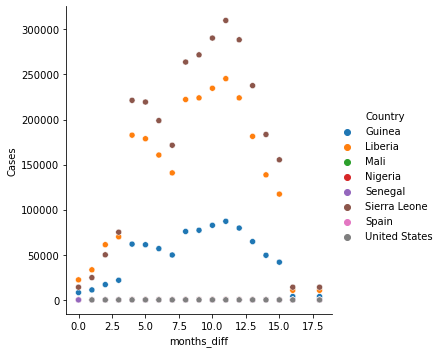

In [18]:
import seaborn as sns
sns.relplot(data=grouped, x='months_diff', y='Cases', hue='Country')
plt.show()

In [20]:
grouped.months_diff.value_counts()

9     8
1     8
16    8
15    8
14    8
13    8
12    8
11    8
10    8
18    8
8     8
7     8
6     8
5     8
4     8
3     8
2     8
0     5
Name: months_diff, dtype: int64

NameError: name 'plt' is not defined

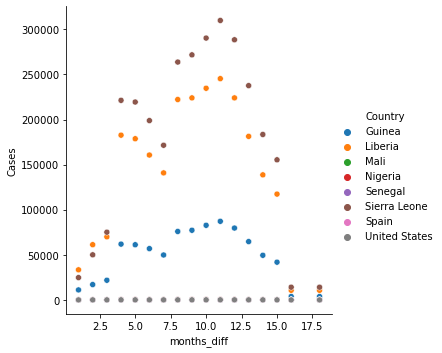

In [21]:
grouped = grouped[grouped['months_diff']!= 0]
sns.relplot(data=grouped, x='months_diff', y='Cases', hue='Country')
plt.show()

In [22]:
grouped.to_csv('ebola_population_aggregate_same_span.csv', index = False)

In [25]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      165 non-null    object 
 1   months_diff  165 non-null    int64  
 2   Cases        165 non-null    float64
 3   Pop_den      165 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


In [ ]:
gr

In [23]:
grouped.to_csv('ebola_population_aggregate.csv', index=False)